In [ ]:
# ************처음에 한 번만 실행해야 함.********************************#
# 이미지를 하나씩 잘라서 폴더(img)에 저장                                 #
# 형식: %s/oxt_000  : 0폴더, 1폴더, 2폴더 데이터를 각 폴더에 저장         #
# 데이터 뻥튀기(좌우대칭, 상하대칭, 좌우상하대칭, +-5도, +-3도 회전) 8배   #

import numpy as np
import glob
import os
import cv2
from PIL import Image

from dataset.oxt import load_oxt

# 디렉토리가 없으면 생성하는 함수
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

# img 디렉토리 생성        
createDirectory('./img')

# img 내 0, 1, 2 디렉토리 생성
for i in range(3):
    dir='./img/%d'%(i)
    createDirectory(dir)

# 노멀라이즈되지 않은 이미지를 불러오기
(x_train, t_train), (x_test, t_test)=load_oxt(normalize=False)

train_size=len(x_train)
test_size=len(x_test)
total=train_size+test_size

# 원본 트레인, 테스트 사이즈 출력
print(train_size, test_size, total)

for i in range(train_size):
    img = x_train[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = ~img
    fname="img/%s/oxt_%04d.jpg"%(t_train[i], i)
    cv2.imwrite(fname, img)

for i in range(test_size):
    img = x_test[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = ~img
    fname="img/%s/oxt_%04d.jpg"%(t_test[i], train_size+i)
    cv2.imwrite(fname, img)
    

# 좌우대칭    
for i in range(train_size):
    img = x_train[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.flip(img, 1)
    img = ~img
    fname="img/%s/oxt_flip_lr_%04d.jpg"%(t_train[i], i)
    cv2.imwrite(fname, img)

for i in range(test_size):
    img = x_test[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.flip(img, 1)
    img = ~img
    fname="img/%s/oxt_flip_lr_%04d.jpg"%(t_test[i], train_size+i)
    cv2.imwrite(fname, img)

# 상하대칭    
for i in range(train_size):
    img = x_train[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.flip(img, 0)
    img = ~img
    fname="img/%s/oxt_flip_td_%04d.jpg"%(t_train[i], i)
    cv2.imwrite(fname, img)

for i in range(test_size):
    img = x_test[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.flip(img, 0)
    img = ~img
    fname="img/%s/oxt_flip_td_%04d.jpg"%(t_test[i], train_size+i)
    cv2.imwrite(fname, img)

# 좌우상하대칭    
for i in range(train_size):
    img = x_train[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.flip(img, -1)
    img = ~img
    fname="img/%s/oxt_flip_ld_%04d.jpg"%(t_train[i], i)
    cv2.imwrite(fname, img)

for i in range(test_size):
    img = x_test[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.flip(img, -1)
    img = ~img
    fname="img/%s/oxt_flip_ld_%04d.jpg"%(t_test[i], train_size+i)
    cv2.imwrite(fname, img)
    
# 회전(5도)
rot_l = cv2.getRotationMatrix2D((14,14), 5, 1)
rot_r = cv2.getRotationMatrix2D((14,14), -5, 1)

for i in range(train_size):
    img = x_train[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.warpAffine(img, rot_l, (0,0))
    img = ~img
    fname="img/%s/oxt_rot_l5_%04d.jpg"%(t_train[i], i)
    cv2.imwrite(fname, img)

for i in range(test_size):
    img = x_test[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.warpAffine(img, rot_l, (0,0))
    img = ~img
    fname="img/%s/oxt_rot_l5_%04d.jpg"%(t_test[i], train_size+i)
    cv2.imwrite(fname, img)
    

# 회전(-5도)
for i in range(train_size):
    img = x_train[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.warpAffine(img, rot_r, (0,0))
    img = ~img
    fname="img/%s/oxt_rot_r5_%04d.jpg"%(t_train[i], i)
    cv2.imwrite(fname, img)

for i in range(test_size):
    img = x_test[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.warpAffine(img, rot_r, (0,0))
    img = ~img
    fname="img/%s/oxt_rot_r5_%04d.jpg"%(t_test[i], train_size+i)
    cv2.imwrite(fname, img)
    
# 회전(3도)
rot_l = cv2.getRotationMatrix2D((14,14), 3, 1)
rot_r = cv2.getRotationMatrix2D((14,14), -3, 1)

for i in range(train_size):
    img = x_train[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.warpAffine(img, rot_l, (0,0))
    img = ~img
    fname="img/%s/oxt_rot_l3_%04d.jpg"%(t_train[i], i)
    cv2.imwrite(fname, img)

for i in range(test_size):
    img = x_test[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.warpAffine(img, rot_l, (0,0))
    img = ~img
    fname="img/%s/oxt_rot_l3_%04d.jpg"%(t_test[i], train_size+i)
    cv2.imwrite(fname, img)
    

# 회전(-3도)
for i in range(train_size):
    img = x_train[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.warpAffine(img, rot_r, (0,0))
    img = ~img
    fname="img/%s/oxt_rot_r3_%04d.jpg"%(t_train[i], i)
    cv2.imwrite(fname, img)

for i in range(test_size):
    img = x_test[i]
    img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
    img = cv2.warpAffine(img, rot_r, (0,0))
    img = ~img
    fname="img/%s/oxt_rot_r3_%04d.jpg"%(t_test[i], train_size+i)
    cv2.imwrite(fname, img)


# 각 폴더에 이미지 불러오기    
img_0=glob.glob('./img/0/*.jpg')
img_1=glob.glob('./img/1/*.jpg')
img_2=glob.glob('./img/2/*.jpg')

# 뻥튀기 된 이미지 갯수 세기
total_img = len(img_0)+len(img_1)+len(img_2)
print("total: ", total_img)

(44160, 784)
(44160, 3)
(11040, 784)
(11040, 3)
train acc, test acc | 0.3333333333333333, 0.3333333333333333
train acc, test acc | 0.546286231884058, 0.5557065217391305
train acc, test acc | 0.5740036231884058, 0.5794384057971015
train acc, test acc | 0.5965579710144927, 0.5940217391304348
train acc, test acc | 0.6609148550724637, 0.6570652173913043
train acc, test acc | 0.6698596014492754, 0.6647644927536231
train acc, test acc | 0.6754302536231884, 0.6681159420289855
train acc, test acc | 0.6826539855072464, 0.6747282608695652
train acc, test acc | 0.6916893115942029, 0.6814311594202899
train acc, test acc | 0.6997282608695652, 0.688768115942029
train acc, test acc | 0.7081748188405798, 0.6983695652173914
train acc, test acc | 0.7196784420289855, 0.7114130434782608
train acc, test acc | 0.7292346014492753, 0.7207427536231884
train acc, test acc | 0.7445652173913043, 0.7358695652173913
train acc, test acc | 0.7626132246376811, 0.7526268115942029
train acc, test acc | 0.774932065217391

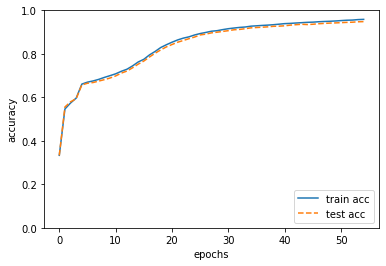

In [1]:
## common.two_layer_net 참조.
## 투레이어넷 모델(chap03)

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.img_oxt import load_oxt
from common.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_oxt(one_hot_label=True)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=3, weight_init_std=0.01)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 240   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:1.08604408184391
=== epoch:1, train acc:0.39121376811594205, test acc:0.39202898550724635 ===
train loss:1.0975094915799863
train loss:1.0931172648678484
train loss:1.079741123158623
train loss:1.087446816386158
train loss:1.0766950903807502
train loss:1.0814746345318815
train loss:1.060058507410045
train loss:1.0741507847136988
train loss:1.077412281807042
train loss:1.0500276777485533
train loss:1.0506813029286843
train loss:1.038116564683016
train loss:1.0329280334488151
train loss:1.045886888524662
train loss:1.0390954320079824
train loss:0.9794344492804666
train loss:1.0511454074432878
train loss:0.9916197073989896
train loss:0.9673027840018238
train loss:1.009763331297949
train loss:0.9594871101824803
train loss:0.9705181894424662
train loss:0.945590856909402
train loss:0.9218486941195894
train loss:0.9755756563877315
train loss:0.9313561527098344
train loss:0.9082175414840089
train loss:0.8545812988654783
train loss:0.8584770140688607
train loss:0.923945545997988
trai

train loss:0.18621706547360722
train loss:0.07877164353429776
train loss:0.11420188178087519
train loss:0.21296243018426472
train loss:0.14439728508334107
train loss:0.08824365044487
train loss:0.2173892390981422
train loss:0.1454934313614136
train loss:0.10797405743378584
train loss:0.10414883084398702
train loss:0.11795174246188166
train loss:0.14140906734869815
train loss:0.08419468831411402
train loss:0.2564691082249689
train loss:0.10300753755255516
train loss:0.16538443130001187
train loss:0.15454894661842555
train loss:0.14452581816705778
train loss:0.14983263659140217
train loss:0.22268418920592808
train loss:0.1624519335834073
train loss:0.14553169945161679
train loss:0.1247658974303658
train loss:0.07464402732886727
train loss:0.08559176594835818
train loss:0.20497408554388824
train loss:0.1775767307527199
train loss:0.07042995755384464
train loss:0.18102175419398867
train loss:0.14198151188139949
train loss:0.07937575544814163
train loss:0.0891530707800826
train loss:0.12147

train loss:0.03624787645947771
train loss:0.16443741795436947
train loss:0.09031981587761848
train loss:0.13899296856957133
train loss:0.07860654250296435
train loss:0.050358981400622525
train loss:0.0309888049964518
train loss:0.15222864184113066
train loss:0.19966080851050727
train loss:0.10422016690048899
train loss:0.06374010496009726
train loss:0.08888765113141464
train loss:0.0480699195684392
train loss:0.04375579772617563
train loss:0.02259536940906143
train loss:0.09916527872788096
train loss:0.06460496037530322
train loss:0.08961229083988004
train loss:0.1149425106238128
train loss:0.07460403176451749
train loss:0.0659720396016538
train loss:0.12195933892362373
train loss:0.06364953067684206
train loss:0.05628135279016886
train loss:0.10004698582941332
train loss:0.08043755841008059
train loss:0.07903490756461912
train loss:0.12327980478227422
train loss:0.10240244970980351
train loss:0.022464793529932938
train loss:0.062043263672158844
train loss:0.08507411081449619
train los

train loss:0.02897656902068023
train loss:0.027135467560895868
train loss:0.058974671358571124
train loss:0.02748707161803173
train loss:0.02320664533167131
train loss:0.03276915933311359
train loss:0.022985737880257616
train loss:0.04645461874031563
train loss:0.0471437402832155
train loss:0.14517284933552818
train loss:0.08826539999025422
train loss:0.07931304359669764
train loss:0.09462374899216965
train loss:0.02371423931735298
train loss:0.06245830185047545
train loss:0.09318089622311462
train loss:0.11635846173422036
train loss:0.027056369244097808
train loss:0.05287700075725997
train loss:0.04047342298783229
train loss:0.07687527166681779
train loss:0.04995104091470233
train loss:0.07123499068985385
train loss:0.03294117505091427
train loss:0.09801016298185111
train loss:0.016878435314826676
train loss:0.1499960468004483
train loss:0.026663986429405994
train loss:0.1576751335325662
train loss:0.06507179443421195
train loss:0.11888328428198026
train loss:0.12323256805397023
train

train loss:0.07412815260709694
train loss:0.009595224107609535
train loss:0.02608753075429761
train loss:0.05681760101621503
train loss:0.12102517649880291
train loss:0.061607782000329764
train loss:0.020005250507233105
train loss:0.046319915977150135
train loss:0.02128759420511737
train loss:0.08252867202216961
train loss:0.024109390175178026
train loss:0.019929576589291283
train loss:0.038007765390336484
train loss:0.008596302172953723
train loss:0.05297322605911351
train loss:0.037958136427091976
train loss:0.044634801406009644
train loss:0.05800490013422429
train loss:0.049412714748672246
train loss:0.07015396784254294
train loss:0.05224361528942164
train loss:0.03988294576074057
train loss:0.008975872745968724
train loss:0.05428155337077696
train loss:0.051810906121860144
train loss:0.04193702306592385
train loss:0.019893374142188013
train loss:0.017676347295084997
train loss:0.025132020007298746
train loss:0.07305922336401854
train loss:0.06471333288643276
train loss:0.0929317998

train loss:0.030363054227070134
train loss:0.021646305688501396
train loss:0.02522757276351321
train loss:0.04056235048228739
train loss:0.055670699338832876
train loss:0.03636437220019276
train loss:0.020747384138480998
train loss:0.06036295208233902
train loss:0.015528871907631362
train loss:0.06515902739119996
train loss:0.02223109723950645
train loss:0.10497890381788573
train loss:0.04282961753741613
train loss:0.04080247156575164
train loss:0.00896945225694935
train loss:0.014371420092818459
train loss:0.035773466618697784
train loss:0.04158898461295061
train loss:0.03624243231440249
train loss:0.06852868441588017
train loss:0.038327362356531176
train loss:0.024719895171281384
train loss:0.024521789970003285
train loss:0.026972844810240086
train loss:0.061211854846155093
train loss:0.03034120834468361
train loss:0.011634882775130806
train loss:0.027706106034300106
train loss:0.012517516237029873
train loss:0.049071550544629486
train loss:0.06856420254131151
train loss:0.0345711115

train loss:0.039237902245849596
train loss:0.01686762886585843
train loss:0.003837709963212706
train loss:0.0638912037720317
train loss:0.05084512747765493
train loss:0.03610167955151859
train loss:0.016577752650185292
train loss:0.029835999714729687
train loss:0.07303454651800305
train loss:0.05728733517467397
train loss:0.018541277730252975
train loss:0.018240245409953115
train loss:0.02775454979277938
train loss:0.033239149787346454
train loss:0.0910489653613717
train loss:0.020951932456393832
train loss:0.03713769198583803
train loss:0.01043837762791116
train loss:0.024356111678290788
train loss:0.0399779575651034
train loss:0.03624465152036481
train loss:0.027995599951595077
train loss:0.024820815710180934
train loss:0.10866202118375148
train loss:0.022627368840482647
train loss:0.01173389728299295
train loss:0.023261139208329538
train loss:0.025591911376065837
train loss:0.013370187346447682
train loss:0.03679058400218417
train loss:0.01155059688424254
train loss:0.01699681861816

train loss:0.011765931418884561
train loss:0.07810294143333675
train loss:0.023392348308850144
train loss:0.05830708432778883
train loss:0.05383391443801824
train loss:0.018716012990179148
train loss:0.028945270785666347
train loss:0.017918971483075783
train loss:0.04098598219894599
train loss:0.04369602125207986
train loss:0.03323138209934627
train loss:0.03363914007689596
train loss:0.028147928271755218
train loss:0.012102469934979376
train loss:0.028647586118204886
train loss:0.01972060517580563
train loss:0.0554171445801976
train loss:0.012515098948080497
train loss:0.03373697368079446
train loss:0.035386303124818407
train loss:0.005284099247595056
train loss:0.05084575069245002
train loss:0.025634473622240715
train loss:0.006015704937234859
train loss:0.008817083935862054
train loss:0.02520398531337429
train loss:0.05290054945099982
train loss:0.01677289566822595
train loss:0.0647168227855749
train loss:0.04034492033032115
train loss:0.009084285575708147
train loss:0.0389532082065

train loss:0.03715429880186621
train loss:0.023209531851367624
train loss:0.030942568136293473
train loss:0.0573887951219474
train loss:0.010866032552624076
train loss:0.006321849291075553
train loss:0.008998158280929222
train loss:0.013670637198498923
train loss:0.007084746379714292
train loss:0.009694885065022604
train loss:0.003787536988165883
train loss:0.02595141248647311
train loss:0.012516160813967024
train loss:0.007043955987705897
train loss:0.011889619174355041
train loss:0.011127146327370314
train loss:0.08868615027429998
train loss:0.018946810504551048
train loss:0.007413578873963711
train loss:0.0055424302746513
train loss:0.01653476524542409
train loss:0.008095601252951567
train loss:0.02334810632293939
train loss:0.0053205939866164875
train loss:0.013563671298441986
train loss:0.045022182327714905
train loss:0.010294099423797583
train loss:0.06779774357907509
train loss:0.00452831243188865
train loss:0.002961472783344015
train loss:0.042076288106256715
train loss:0.06183

train loss:0.006730184388928347
train loss:0.0059365318997123264
train loss:0.025502700377681986
train loss:0.005402765715259894
train loss:0.009448438097566502
train loss:0.012324214144657316
train loss:0.0028978728664618525
train loss:0.00719130411703421
train loss:0.031889773250972676
train loss:0.01846376012909725
train loss:0.013745393179322283
train loss:0.027021692982783133
train loss:0.025088764296506316
train loss:0.0032149532895965976
train loss:0.016231692642110912
train loss:0.03754554931477569
train loss:0.02413701911794226
train loss:0.05100635925457653
train loss:0.014347725398343957
train loss:0.0037789516368748667
train loss:0.01709831946577663
train loss:0.030829807018596486
train loss:0.05972225491633384
train loss:0.003657848986156445
train loss:0.023256579681833364
train loss:0.011746442497233608
train loss:0.019629131719709533
train loss:0.034439943545362214
train loss:0.011100936360414756
train loss:0.012401027236488987
train loss:0.004579747072031247
train loss:

train loss:0.026305349294652353
train loss:0.0182391485640631
train loss:0.009413945214662912
train loss:0.02530510774950077
train loss:0.004726193997584362
train loss:0.02917721050514683
train loss:0.008315189764917715
train loss:0.006734046631429023
train loss:0.03854227927314912
train loss:0.015654312598969742
train loss:0.01023089579561594
train loss:0.011542058282996674
train loss:0.006865672285781886
train loss:0.06753035423763035
train loss:0.0064326292889748445
train loss:0.012091822597334689
train loss:0.019928490747968954
train loss:0.015670315242924678
train loss:0.017004153009468743
train loss:0.00468198904584014
train loss:0.004249054521791561
train loss:0.008617935206453993
train loss:0.01412955093194426
train loss:0.027432423496340144
train loss:0.02991421023587424
train loss:0.035578433185075344
train loss:0.041186718508371974
train loss:0.009069335269841765
train loss:0.03191102549271382
train loss:0.011771504691153003
train loss:0.01278958663519878
train loss:0.067436

train loss:0.02625828201997159
train loss:0.0036039469982610305
train loss:0.030123319060607532
train loss:0.0077327199832353775
train loss:0.00410215208857929
train loss:0.01752404193989141
train loss:0.008295661697762767
train loss:0.011247521586717124
train loss:0.014687943918753455
train loss:0.002985522277273493
train loss:0.001777175546134276
train loss:0.011387049129421305
train loss:0.023208257520727426
train loss:0.029845738954792568
train loss:0.004636484654481118
train loss:0.025068428797629782
train loss:0.0177556438563947
train loss:0.0023616834514875213
train loss:0.0022465669432134693
train loss:0.01621440041249563
train loss:0.02006196845045761
train loss:0.008786154172382562
train loss:0.00369495657073957
train loss:0.01433661271335914
train loss:0.02932455612641841
train loss:0.0024340432837835686
train loss:0.0017424176531780071
train loss:0.003546611066150551
train loss:0.02203962496914606
train loss:0.004686511861679058
train loss:0.014850098902643345
train loss:0.

train loss:0.007254898115519915
train loss:0.04791545604133064
train loss:0.005259747547170641
train loss:0.010069031230449232
train loss:0.03243007559196816
train loss:0.021972392925211914
train loss:0.0024357082189034726
train loss:0.0020990098445776524
train loss:0.002916746149808208
train loss:0.0024789691522250096
train loss:0.002264527930568257
train loss:0.006797809082049433
train loss:0.008113607655413793
train loss:0.02652683709957428
train loss:0.030632114700750546
train loss:0.00467390144513567
train loss:0.019286922615804947
train loss:0.01784317038055648
train loss:0.038506124916641335
train loss:0.019887813972285607
train loss:0.08452485317347162
train loss:0.003940655791218503
train loss:0.014130967062700395
train loss:0.022039248915359317
train loss:0.017694743751973066
train loss:0.015293692821471508
train loss:0.06057111391272262
train loss:0.0419905479905563
train loss:0.01672064426691248
train loss:0.011864279423935585
train loss:0.003877617076127137
train loss:0.01

train loss:0.022199658940171015
train loss:0.0344859271581497
train loss:0.00876062779634473
train loss:0.006515896276567381
train loss:0.01847834002768616
train loss:0.008047599516693133
train loss:0.008433927353781972
train loss:0.0022677170719969807
train loss:0.013580318650365412
train loss:0.041036460247971134
train loss:0.03675714275560303
train loss:0.023402072741583613
train loss:0.012170149759161383
train loss:0.013215238224571522
train loss:0.029723826208864854
train loss:0.008179306235719773
train loss:0.019048508404689087
train loss:0.021399982440398875
train loss:0.016673367274242012
train loss:0.06055293304260768
train loss:0.008340445125187522
train loss:0.00826883144783835
train loss:0.007846809405601592
train loss:0.02908946864733281
train loss:0.015630072254508402
train loss:0.005506480585843529
train loss:0.01513819844072087
train loss:0.06539157884128778
train loss:0.02259896489516062
train loss:0.008688803995501532
train loss:0.02944697550619203
train loss:0.012896

train loss:0.00259836504998302
train loss:0.0137006564027761
train loss:0.004670213429640482
train loss:0.010453756096135254
train loss:0.01695882875892951
train loss:0.019715757718043393
train loss:0.013630878181880244
train loss:0.004638069462270437
train loss:0.0024944268965665798
train loss:0.009743182187497482
train loss:0.0032950747394913846
train loss:0.015755630941043187
train loss:0.004976623780313059
train loss:0.019450991193319986
train loss:0.012290712435587981
train loss:0.020276873874706745
train loss:0.0021359038511564983
train loss:0.02193488899227566
train loss:0.018166883978263694
train loss:0.020202973223124584
train loss:0.008074945024924297
train loss:0.006082741381335041
train loss:0.013412058303917422
train loss:0.0017793468028803599
train loss:0.006155601737805303
train loss:0.04102128721748834
train loss:0.01117772635514525
train loss:0.005402340670201704
train loss:0.006463926438321704
train loss:0.03231093992946008
train loss:0.015014787452425375
train loss:0

train loss:0.008391592812787051
train loss:0.0036533507645679763
train loss:0.0014508696162461494
train loss:0.009045706037790683
train loss:0.0077430067198538685
train loss:0.018876823639274117
train loss:0.00037428948558657115
train loss:0.0038670265472742766
train loss:0.004035914933722109
train loss:0.0012083268720794252
train loss:0.01232363737889929
train loss:0.005918038608644016
train loss:0.004360817387280313
train loss:0.00786242798030657
train loss:0.005293821024359905
train loss:0.023083949843986692
train loss:0.00631803374641259
train loss:0.006292766332649563
train loss:0.007660476077085701
train loss:0.009480674500273704
train loss:0.001768486083028334
train loss:0.0025201499151643273
train loss:0.03219553166950749
train loss:0.0026829011063052664
train loss:0.003725012361768407
train loss:0.007977048139965555
train loss:0.0017610653557596121
train loss:0.03602644286088842
train loss:0.010840989803375563
train loss:0.006073897890724785
train loss:0.006089095168469563
tra

train loss:0.0022803944890409924
train loss:0.004338179973546135
train loss:0.007939792284642469
train loss:0.02388214493654494
train loss:0.004286757345783829
train loss:0.01537026418881431
train loss:0.001305327168800268
train loss:0.015251353597443786
train loss:0.015962021087111058
train loss:0.013541781115530793
train loss:0.003634396787970205
train loss:0.008787253098843496
train loss:0.001899507751105938
train loss:0.007254205227056139
train loss:0.015627479264897458
train loss:0.06259567638115736
train loss:0.011881001728902392
train loss:0.017134705780191606
train loss:0.0031083728774619823
train loss:0.006855081977106403
train loss:0.004403400820770945
train loss:0.0065947207355103905
train loss:0.011772770207278578
train loss:0.021722806976047625
train loss:0.005793697265567283
train loss:0.004511516715896534
train loss:0.00869872922030225
train loss:0.00569729682048114
train loss:0.01185149678534441
train loss:0.01109820993362826
train loss:0.005328218433492244
train loss:0

train loss:0.01552815344917802
train loss:0.0027303084841608727
train loss:0.021329762851784395
train loss:0.01630123082722316
train loss:0.0059477847023164535
train loss:0.0057645187703212215
train loss:0.002937508528156264
train loss:0.005674717713880257
train loss:0.005781335667947043
train loss:0.0009478885089768289
train loss:0.00781540605240162
train loss:0.0024636327981124974
train loss:0.005980848285454499
train loss:0.003212852165817223
train loss:0.0037031277752271117
train loss:0.002024550344645332
train loss:0.012045578377618337
train loss:0.016719017893230777
train loss:0.003016700577476486
train loss:0.002513821528345819
train loss:0.004504451585613281
train loss:0.002655278374949742
train loss:0.002891288867836552
train loss:0.004381813658332045
train loss:0.004631422185777958
train loss:0.01267215456494732
train loss:0.06041773400907462
train loss:0.0021756763196711187
train loss:0.01580100285884119
train loss:0.0025180581087791607
train loss:0.005711611174212278
train 

train loss:0.00914599038923927
train loss:0.014669920051340806
train loss:0.006638980056834284
train loss:0.004243753643994954
train loss:0.00626854230576247
train loss:0.0032957551273626127
train loss:0.004750584079890008
train loss:0.0065292583468668985
train loss:0.0027350927017235505
train loss:0.0027149499926698776
train loss:0.0019092316479038455
train loss:0.005952570916635779
train loss:0.00784792142800267
train loss:0.00732204456821038
train loss:0.002091716874437183
train loss:0.0018114986819304036
train loss:0.0011377676079450255
train loss:0.019488471205624112
train loss:0.010837155616495227
train loss:0.0016693517053598
train loss:0.0027270177599588996
train loss:0.0058063759386785905
train loss:0.0005409963817663393
train loss:0.0014493431246225808
train loss:0.03309893840484996
train loss:0.0013065021435005862
train loss:0.0022678961108114903
train loss:0.0036692040937676344
train loss:0.004850480951136977
train loss:0.011347825123328348
train loss:0.0020674445555979282


train loss:0.016994111021388352
train loss:0.0014989618120807148
train loss:0.0017446724125070184
train loss:0.004282889257648626
train loss:0.0014191495336868204
train loss:0.013679619895413527
train loss:0.002867260069210255
train loss:0.015278814107945925
train loss:0.0011389787940826175
train loss:0.003213001754759851
train loss:0.001571612728774882
train loss:0.0020929842295569897
train loss:0.03877660396424778
train loss:0.002272892989369586
train loss:0.0017065000608962576
train loss:0.0007641373881487996
train loss:0.0011969486987898092
train loss:0.001566951044964395
train loss:0.003335753326151539
train loss:0.009490125930296632
train loss:0.0037471476317057785
train loss:0.0028993125555667344
train loss:0.001471128574084376
train loss:0.004291628372440198
train loss:0.009784002455904337
train loss:0.0038404235904254402
train loss:0.0011801813931687937
train loss:0.007584865281616106
train loss:0.0017624392402655615
train loss:0.005922426554836005
train loss:0.001413658250724

train loss:0.0015244008276039266
train loss:0.0019261319425713326
train loss:0.0041188489658359915
train loss:0.002035082353219068
train loss:0.0012172566282202186
train loss:0.007388563329025709
train loss:0.04098078594601035
train loss:0.0030071900053583642
train loss:0.008854866844189286
train loss:0.0013989022630747838
train loss:0.008635079058266997
train loss:0.01156668465899758
train loss:0.0028176679488180136
train loss:0.0010127180583924232
train loss:0.005985035584167525
train loss:0.002198577164374401
train loss:0.017926960863184863
train loss:0.02773976169089909
train loss:0.0037948860983123287
train loss:0.0057758056172648505
train loss:0.018319097142376728
train loss:0.012587476866669367
train loss:0.004116778839128549
train loss:0.004978334762595109
train loss:0.007436690734739684
train loss:0.0027333723678189445
train loss:0.005543437071488166
train loss:0.014359164316167012
train loss:0.0012833384787026881
train loss:0.0005917300927626211
train loss:0.00667041540250532

train loss:0.0031397399044630994
train loss:0.0014750912005172501
train loss:0.006365488505052104
train loss:0.002369221802051584
train loss:0.011943655380875632
train loss:0.005875815160565834
train loss:0.0015850710635690907
train loss:0.0027450379943491027
train loss:0.0021526574789500225
train loss:0.0015135059575982835
train loss:0.0006314435812814266
train loss:0.0013653751456301267
train loss:0.005029486124882013
train loss:0.002522793022598493
train loss:0.006228244270034554
train loss:0.0017689542562202717
=== epoch:16, train acc:0.9977807971014493, test acc:0.9876811594202899 ===
train loss:0.0108717722800357
train loss:0.007748296701168213
train loss:0.002430341616942371
train loss:0.0039885858309043655
train loss:0.0007475885555144416
train loss:0.004799201974630604
train loss:0.002319576341717643
train loss:0.001263690131883518
train loss:0.0028543027283038655
train loss:0.01411245191317932
train loss:0.0016982010431056927
train loss:0.003980197110396179
train loss:0.00267

train loss:0.004720975632228374
train loss:0.0024956586346856695
train loss:0.0071826940362821
train loss:0.0023418111689334636
train loss:0.0006175600034606651
train loss:0.007669420366053721
train loss:0.001156153402548722
train loss:0.001959435282618308
train loss:0.0015171736400528782
train loss:0.013056329657165123
train loss:0.005135386638468071
train loss:0.0039641711531439505
train loss:0.0017454897609311029
train loss:0.0001679707925117613
train loss:0.0016736382495385602
train loss:0.001036698429126184
train loss:0.0015173439887853624
train loss:0.0002360934581397534
train loss:0.005958007926791647
train loss:0.00048016279055045736
train loss:0.004117986844464475
train loss:0.0022612562069143378
train loss:0.003849373385620147
train loss:0.008384894741852706
train loss:0.0033973398397617077
train loss:0.001031755088014365
train loss:0.046054784998543104
train loss:0.0006360850455110397
train loss:0.0021569393257261623
train loss:0.006919898219905696
train loss:0.0009466746714

train loss:0.015638643307864138
train loss:0.013260641640690877
train loss:0.03326320560109845
train loss:0.0025868866375718795
train loss:0.00657243449417022
train loss:0.002451306934006643
train loss:0.006165242440576
train loss:0.0030786951636601096
train loss:0.005322127868729454
train loss:0.0109022208096762
train loss:0.00129152715842839
train loss:0.0034937810363184314
train loss:0.0028846160126075504
train loss:0.0024996968590229717
train loss:0.033755183225742065
train loss:0.008620394894399036
train loss:0.0014930348070318002
train loss:0.004061580328253626
train loss:0.0007990357763526937
train loss:0.001692285668159425
train loss:0.0022247321237942002
train loss:0.006534114004231676
train loss:0.011882711735271246
train loss:0.025078349670564683
train loss:0.0026367036244829846
train loss:0.009960078384859636
train loss:0.0032507877051465577
train loss:0.008845968925052702
train loss:0.0034442479178360143
train loss:0.001033346740883829
train loss:0.005661250866586905
train

train loss:0.00115851296848709
train loss:0.009603981542138873
train loss:0.01635592005730756
train loss:0.0007598619410557272
train loss:0.0039507371916454375
train loss:0.009255745501141471
train loss:0.003590247815457748
train loss:0.007465707651955725
train loss:0.005913362593341321
train loss:0.01658526276972657
train loss:0.0018433324346631946
train loss:0.010215959621005176
train loss:0.006660143211649695
train loss:0.007511409119026644
train loss:0.003566580959883922
train loss:0.0028968206183318467
train loss:0.002753108281671579
train loss:0.002010825065024205
train loss:0.002197723684246609
train loss:0.005575141757622354
train loss:0.0039223167544660716
train loss:0.0033702344302701153
train loss:0.004184197182130444
train loss:0.0008237306608550254
train loss:0.0036766288712300177
train loss:0.0021079780726701567
train loss:0.01469180355995668
train loss:0.00043606893112076855
train loss:0.0004739031718331307
train loss:0.0022792684613302753
train loss:0.000713024268740006

train loss:0.0011730472911607925
train loss:0.01941173796110531
train loss:0.0004484711031937941
train loss:0.005376819864474287
train loss:0.0009493334938514136
train loss:0.001635020740113689
train loss:0.013551026329097687
train loss:0.007423545717942617
train loss:0.0017971984950810851
train loss:0.002393480543346357
train loss:0.0023397633336470105
train loss:0.014155846397856074
train loss:0.0032482488466251966
train loss:0.004656917806845052
train loss:0.001994858214438926
train loss:0.0022921144776922578
train loss:0.0008991073996134749
train loss:0.003371757752322758
train loss:0.008593742115613241
train loss:0.00701448083278257
train loss:0.0033397042144768267
train loss:0.004824397638393238
train loss:0.0046542448080583824
train loss:0.0016629070843952255
train loss:0.0034304368263783206
train loss:0.000768935867681581
train loss:0.005016692756954979
train loss:0.004906794886054632
train loss:0.0011477741799950597
train loss:0.0004229900381270823
train loss:0.004645887362491

train loss:0.0038508509427604355
train loss:0.00566425287527153
train loss:0.022393005243422383
train loss:0.015904004333851102
train loss:0.0034344830961483015
train loss:0.0004235631848471213
train loss:0.00036763207774980454
train loss:0.0011314023688143503
train loss:0.0017415033247225144
train loss:0.00699442609615275
train loss:0.0005478357128726214
train loss:0.004494103480825353
train loss:0.008506216818759198
train loss:0.006661399086824946
train loss:0.00809556496294705
train loss:0.004137300366973464
train loss:0.01849993137356854
train loss:0.0019213005601265744
train loss:0.0016755098615323226
train loss:0.001948689139629199
train loss:0.007127279028692903
train loss:0.0008003005989267523
train loss:0.006416236229488997
train loss:0.000820206047285743
train loss:0.0057129085670210725
train loss:0.0056580755993465995
train loss:0.00436140110247024
train loss:0.0024570002785221975
train loss:0.00452233067853294
train loss:0.0015321183335261072
train loss:0.004302068637107615

train loss:0.0012686041720895741
train loss:0.011565040103769419
train loss:0.000630003726883735
train loss:0.001206751740274571
train loss:0.001278792540509911
train loss:0.005850624812532648
train loss:0.0012917449838169795
train loss:0.015858633990069825
train loss:0.01459986899321417
train loss:0.0019676760263173825
train loss:0.0038929955137055466
train loss:0.007006996342328546
train loss:0.0008665027928836225
train loss:0.0038265016737665304
train loss:0.0009644885632024374
train loss:0.017001861473955045
train loss:0.000526514077887138
train loss:0.0027190951888911028
train loss:0.0026479057698245113
train loss:0.005209605487640355
train loss:0.0006658491977892833
train loss:0.004262703548552832
train loss:0.001685326519306929
train loss:0.0020344102402885264
train loss:0.0026339063052502236
train loss:0.0018951753516606032
train loss:0.007953567530949656
train loss:0.0018752369230405066
train loss:0.0036352113073303037
train loss:0.0006569712787580998
train loss:0.004865088801

train loss:0.0005201587243854243
train loss:0.00881422641878185
train loss:0.002225028380059588
train loss:0.0009197793411665628
train loss:0.002549989267603021
train loss:0.0006725312423967237
train loss:0.0054208305829077175
train loss:0.009830588276882902
train loss:0.0013817075763367347
train loss:0.0010891260352168294
train loss:0.020313792976374513
train loss:0.0010482587488074985
train loss:0.0015438034676266371
train loss:0.015014873516415546
train loss:0.0037946964613079495
train loss:0.0006392897556237953
train loss:0.00920949405375407
train loss:0.001485490523877493
train loss:0.0019446814403198322
train loss:0.001196508607676154
train loss:0.020449646734179577
train loss:0.0005959137114654835
train loss:0.001534584028369245
train loss:0.0018249944740673292
train loss:0.0007785816274675187
train loss:0.008070149535693039
train loss:0.0038100462796533717
train loss:0.004844125263733101
train loss:0.0013176252900195574
train loss:0.0020227510926486775
train loss:0.002864814066

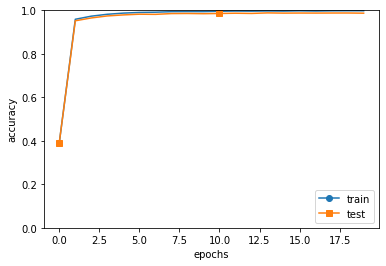

In [19]:
## 멀티레이어넷(ch06)

# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.img_oxt import load_oxt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_oxt()

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=3, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=120,
                  optimizer='Adam', optimizer_param={'lr': 0.001}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.9, 1.0)
plt.legend(loc='lower right')
plt.show()


train loss:1.0966958448114241
=== epoch:1, train acc:0.493, test acc:0.539 ===
train loss:1.095397297495027
train loss:1.09199623390004
train loss:1.0870957632205873
train loss:1.0824872973739166
train loss:1.0750904571035071
train loss:1.0582807511120123
train loss:1.054332268574783
train loss:1.0297485608186205
train loss:1.0080241741712894
train loss:1.0035017400498754
train loss:0.9675935263228225
train loss:0.9325234344855179
train loss:0.8957971200729593
train loss:0.898541775684192
train loss:0.8696216480034246
train loss:0.8550234480237203
train loss:0.9271816046288497
train loss:0.8651681309065378
train loss:0.737629513462322
train loss:0.7387806533225032
train loss:0.756270561890266
train loss:0.8922409568672867
train loss:0.755210804038338
train loss:0.7813907197892721
train loss:0.690574369864433
train loss:0.7119622450415939
train loss:0.7961212841393266
train loss:0.7959087495483814
train loss:0.7078929365412951
train loss:0.8242697740453362
train loss:0.7400416695562536


train loss:0.07706169617661177
train loss:0.1034373618483771
train loss:0.10332318840183058
train loss:0.1657284925863749
train loss:0.09118056053288552
train loss:0.16218298714187274
train loss:0.14527415293730306
train loss:0.12235531162945623
train loss:0.14044909274580805
train loss:0.10797475105941663
train loss:0.0774135677399715
train loss:0.16099358755264498
train loss:0.11162738783100395
train loss:0.15700785296320108
train loss:0.08558806754887359
train loss:0.11422159732913319
train loss:0.11302697631097856
train loss:0.16534847619388077
train loss:0.12994074411918913
train loss:0.09042268868644462
train loss:0.0771850245450407
train loss:0.04989840669948166
train loss:0.16256099436011423
train loss:0.08094284353054657
train loss:0.0812105341757139
train loss:0.21125277171004192
train loss:0.10885412036301627
train loss:0.14629313120317639
train loss:0.09000704947625546
train loss:0.11040906531458373
train loss:0.08183650367874969
train loss:0.07179836737179165
train loss:0.

train loss:0.12052706733723767
train loss:0.07601734655988898
train loss:0.11554524937290325
train loss:0.09493607669834545
train loss:0.08009346127202124
train loss:0.09645281872074116
train loss:0.1222265627637663
train loss:0.056875295967369704
train loss:0.05984878567325466
train loss:0.06013791869354711
train loss:0.06442241300416597
train loss:0.06172845641338035
train loss:0.047592378741595984
train loss:0.023703757879392474
train loss:0.06341994423919124
train loss:0.07284907601727131
train loss:0.015339923518078264
train loss:0.05900828800887322
train loss:0.03021813880777978
train loss:0.025392013056304275
train loss:0.07239659030365685
train loss:0.08597444147568215
train loss:0.05438136856184542
train loss:0.0735046670837367
train loss:0.07810608324342369
train loss:0.04558708190822973
train loss:0.07538762789876724
train loss:0.03193060892261501
train loss:0.0933046441236714
train loss:0.06902940929015343
train loss:0.12707628006294935
train loss:0.06931241616694361
train 

train loss:0.017085365791974498
train loss:0.04177757368613041
train loss:0.06756648081326158
train loss:0.04590281403794247
train loss:0.02237993360578829
train loss:0.03147915759741127
train loss:0.021158320342705976
train loss:0.018452835249774924
train loss:0.024023559520874076
train loss:0.04920027387710595
train loss:0.053413914366233085
train loss:0.03061852110866965
train loss:0.018603548299167657
train loss:0.0379767105389648
train loss:0.055103030065312496
train loss:0.035167184618133916
train loss:0.027353803722488048
train loss:0.014789109568188817
train loss:0.03608685103734085
train loss:0.043021375200621007
train loss:0.025491068622238384
train loss:0.03855298017150171
train loss:0.02414791003762779
train loss:0.037703166678688955
train loss:0.07183861841583668
train loss:0.04184861355881342
train loss:0.018507679610785786
train loss:0.03508463448763819
train loss:0.0286807315296732
train loss:0.017084507074987473
train loss:0.04791095159036026
train loss:0.1108733671908

train loss:0.015773100836610966
train loss:0.02795557324474388
train loss:0.05289779608409136
train loss:0.014504290471059696
train loss:0.01952241217802313
train loss:0.012802100411204158
train loss:0.01388337239126612
train loss:0.02543069911002645
train loss:0.011856223503703502
train loss:0.023370822018303018
train loss:0.02220889490747225
train loss:0.027282802368812094
train loss:0.039536718329068056
train loss:0.00963782379938302
train loss:0.01802752003417058
train loss:0.012403449088096758
train loss:0.011699733487397586
train loss:0.03868142968923743
train loss:0.018892689810312734
train loss:0.032944025710182366
train loss:0.017335191137632846
train loss:0.013019009439146278
train loss:0.043416610280075714
train loss:0.022201231352301065
train loss:0.016587764430566577
train loss:0.0113150449544156
train loss:0.01075007762188059
train loss:0.013142341063994407
train loss:0.03142632259777057
train loss:0.027804793928781213
train loss:0.032230665847967854
train loss:0.02003925

train loss:0.013417354997794229
train loss:0.02866759314965134
train loss:0.019819547011237098
train loss:0.009002046109707966
train loss:0.010121721799713535
train loss:0.011087792961811668
train loss:0.014881287101959925
train loss:0.03156951179831061
train loss:0.04672534555810892
train loss:0.020268678150531468
train loss:0.010206299138877373
train loss:0.009173354997954101
train loss:0.025871132564091667
train loss:0.033193108054145846
train loss:0.011160560373194798
train loss:0.006385296805130433
train loss:0.009890517690142049
train loss:0.01823764862432438
train loss:0.01152206420106127
train loss:0.014602946188078383
train loss:0.05075664776408841
train loss:0.015053249945186345
train loss:0.017050069419238485
train loss:0.012449811482687995
train loss:0.017808389917845148
train loss:0.04668498768031853
train loss:0.020252624642236036
train loss:0.011180916386881491
train loss:0.009247551485233005
train loss:0.0874283350516253
train loss:0.00943691682458048
train loss:0.00907

train loss:0.00905165122698428
train loss:0.007820600110086508
train loss:0.00853452152795424
train loss:0.004764150514192031
train loss:0.016879574179072508
train loss:0.007854048741531889
train loss:0.008152069656480632
train loss:0.0037307745404317654
train loss:0.05938964462404066
train loss:0.006710749513168592
train loss:0.013720755136992658
train loss:0.008887323652628308
train loss:0.012743154795129634
train loss:0.0143891072820043
train loss:0.00905335394512941
train loss:0.00619219934665116
train loss:0.007249435484520368
train loss:0.03686535938529773
train loss:0.003479254424014961
train loss:0.010505365174282003
train loss:0.00216126242003075
train loss:0.0065890488477785645
train loss:0.008276775199738066
train loss:0.00588979698064824
train loss:0.00437194679097629
train loss:0.01115356407176028
train loss:0.034700480842299784
train loss:0.015288834123216482
train loss:0.009019037424865591
train loss:0.00814342043161289
train loss:0.011998885657605762
train loss:0.017020

train loss:0.006366214976648345
train loss:0.0031089087597821344
train loss:0.00970882481481063
train loss:0.014837543719338368
train loss:0.004734224763396241
train loss:0.03095799812829998
train loss:0.007585398798695825
train loss:0.0035904504359370927
train loss:0.002194209957191878
train loss:0.008747905673149625
train loss:0.010813945472576683
train loss:0.008385993436987463
train loss:0.004024275310835318
train loss:0.012994643863875732
train loss:0.0037855712784763663
train loss:0.0024274345947190154
=== epoch:6, train acc:0.996, test acc:0.992 ===
train loss:0.0072420032755985166
train loss:0.012394952827691146
train loss:0.0018458408116583751
train loss:0.008227808917231183
train loss:0.021247270216508032
train loss:0.018519097026480143
train loss:0.00754706123573075
train loss:0.011888966767024124
train loss:0.007574407548663352
train loss:0.005212316372305292
train loss:0.01550125029139271
train loss:0.012006310999107643
train loss:0.007874646992883287
train loss:0.01300674

train loss:0.0064795754519291265
train loss:0.010724359689525008
train loss:0.0029096667013446616
train loss:0.0013170252344463674
train loss:0.005096006699043502
train loss:0.0034187700508504838
train loss:0.0009530879525700317
train loss:0.0064051388810572275
train loss:0.011980873793913027
train loss:0.007773162009221555
train loss:0.003109888361139854
train loss:0.00673952912467667
train loss:0.0034741165609534137
train loss:0.017823565797920493
train loss:0.0064036987873604565
train loss:0.00499601620655739
train loss:0.0032277626068843842
train loss:0.002233148716840645
train loss:0.004456055145508784
train loss:0.012520813488448192
train loss:0.0029300630078646704
train loss:0.015048062187885701
train loss:0.01064153333718282
train loss:0.009386980225561123
train loss:0.004539055170639422
train loss:0.015405356089795662
train loss:0.006155170671849647
train loss:0.003115186574536599
train loss:0.0058560726371762375
train loss:0.003817928386405418
train loss:0.005980826459799916


train loss:0.002123393196343832
train loss:0.0037992218064811165
train loss:0.002882642213810192
train loss:0.0019015036789112128
train loss:0.0019885266937682156
train loss:0.0019594232168657463
train loss:0.0021540310546426206
train loss:0.03778678209822308
train loss:0.0019997617492544277
train loss:0.005271372822536605
train loss:0.0023659130583817732
train loss:0.0017691629716260755
train loss:0.0030300863660559416
train loss:0.003790402420929934
train loss:0.0021354416248746855
train loss:0.0031684053245645766
train loss:0.0014017230805405808
train loss:0.0057229068828468415
train loss:0.005819910631561382
train loss:0.0034358002211420198
train loss:0.004984329534919163
train loss:0.005274308643672043
train loss:0.008362475864940492
train loss:0.007548676251787523
train loss:0.0012010201282439564
train loss:0.016863472258222007
train loss:0.005013187908852481
train loss:0.0008792265068352147
train loss:0.0008597843755377731
train loss:0.0025943046697440623
train loss:0.0038107476

train loss:0.0013053315366052508
train loss:0.0021592954308380817
train loss:0.011034963326045968
train loss:0.0013214896164369077
train loss:0.0005218704727933957
train loss:0.0013753112355634088
train loss:0.0068262477375681235
train loss:0.0049370700805457645
train loss:0.0005529937050699591
train loss:0.009559962069667234
train loss:0.014708125262647892
train loss:0.0009016386469281062
train loss:0.003300561390030175
train loss:0.006600265554383895
train loss:0.001661907039356085
train loss:0.001227890944552675
train loss:0.0029431611503136913
train loss:0.0008350523424294497
train loss:0.019040385290050386
train loss:0.0018865520412586468
train loss:0.006247844918295529
train loss:0.0023909407118472307
train loss:0.0017050986622343543
train loss:0.002503491272753898
train loss:0.014399359237118093
train loss:0.0023767537141062304
train loss:0.0023362049338556874
train loss:0.0026548330860115383
train loss:0.0002973203054542921
train loss:0.0015263681639395763
train loss:0.00353575

train loss:0.0023831707187064012
train loss:0.001951317014701471
train loss:0.0017039677642298537
train loss:0.019023212618542434
train loss:0.0034549108976095638
train loss:0.0037992514983915425
train loss:0.005695748149892389
train loss:0.001157083933251825
train loss:0.0014093476829348894
train loss:0.0021356131552011564
train loss:0.009595929335121151
train loss:0.0040058393681741645
train loss:0.007343461362242527
train loss:0.003150639342959608
train loss:0.005641040399847851
train loss:0.004423720076082859
train loss:0.017206161677229204
train loss:0.00490937693075592
train loss:0.002111072527456374
train loss:0.001912793459439063
train loss:0.001588546799790266
train loss:0.0035123577090495233
train loss:0.018099825971331994
train loss:0.0057341270412014506
train loss:0.006812577171867733
train loss:0.0010983854654648291
train loss:0.016024118040172827
train loss:0.0006947341481673315
train loss:0.0056923370601195955
train loss:0.0015294238115993648
train loss:0.004413230003298

train loss:0.001879607904126999
train loss:0.0025050122671303075
train loss:0.0006419907444058653
train loss:0.006827728279247213
train loss:0.0026812225452504087
train loss:0.001049795177950911
train loss:0.008585810455663336
train loss:0.014066118145871831
train loss:0.002947328901797612
train loss:0.004051322488678867
train loss:0.0012511885559336432
train loss:0.0012655679484185776
train loss:0.0025084931094467855
train loss:0.017841519966057665
train loss:0.00043791960868580504
train loss:0.0009752618944965347
train loss:0.0009518146673456571
train loss:0.004272234208163835
train loss:0.0005551344685714103
train loss:0.0017570198232042698
train loss:0.0041955750154878575
train loss:0.002085672262038434
train loss:0.0020271808398681745
train loss:0.0013407779862632922
train loss:0.0017302046653262448
train loss:0.0020278361585948797
train loss:0.0009221864685598655
train loss:0.0003993614891901128
train loss:0.0009583372291768355
train loss:0.001728807081382218
train loss:0.0011034

train loss:0.0016058737078489768
train loss:0.0010815484179808063
train loss:0.0016964345613351012
train loss:0.0015876777433353425
train loss:0.002377082002892991
train loss:0.002229220550402956
train loss:0.0010411358291911497
train loss:0.0007485614877132388
train loss:0.0002787173935632758
train loss:0.0006036904355195098
train loss:0.0010447833187120358
train loss:0.0006151476845361938
train loss:0.002057138755448481
train loss:0.001456833001412412
train loss:0.0023066186869644856
train loss:0.0009858855051860227
train loss:0.0009933232516390444
train loss:0.0006060334322820669
train loss:0.0002908154624947286
train loss:0.001171082710399391
train loss:0.0015387162814539724
train loss:0.0003499556018368752
train loss:0.003660265660035721
train loss:0.00034300199935361945
train loss:0.002692506588557484
train loss:0.0005692868084950322
train loss:0.0001722494833477343
train loss:0.001048958138500818
train loss:0.0006143722253563549
train loss:0.0022853448543757233
train loss:0.0046

train loss:0.003718829566719625
train loss:0.0005061127598885545
train loss:0.001744327373611736
train loss:0.0012206170434537534
train loss:0.000300788322831131
train loss:0.0010050563481404833
train loss:0.0005402449278691983
train loss:0.0022032862861303486
train loss:0.0010667657868594369
train loss:0.00024162288644317235
train loss:0.0012483655885954766
train loss:0.0004188148895501905
train loss:0.0002633090801757296
train loss:0.002520426396402014
train loss:0.0010051271500251071
train loss:0.002087270016449674
train loss:0.0010246547032599185
train loss:0.00038123659509138065
train loss:0.0015079282836347344
train loss:0.0013858363446914595
train loss:0.0026691171534829828
train loss:0.0007896170748425909
train loss:0.0003791146602116394
train loss:0.0015176010380687694
train loss:0.0003140930681404108
train loss:0.0014363834392937304
train loss:0.00034750228120117104
train loss:0.0008787928715894542
train loss:0.002879784350118292
train loss:0.00037562064610785836
train loss:0

train loss:0.004187652933996591
train loss:0.0027195038331881286
train loss:0.00048198632875431463
train loss:0.0004115689968314536
train loss:0.0009695294713911197
train loss:0.002097373521511861
train loss:0.00018175416524917248
train loss:0.0007743796187327734
train loss:0.0006891822017975766
train loss:0.0005737633134217508
train loss:0.0005291191051894425
train loss:0.0033644278094063524
train loss:0.0006031299808520632
train loss:0.0014279974752840028
train loss:0.002410593999936052
train loss:0.0006744292532222915
train loss:0.002628043012527613
train loss:0.00044890980487563033
train loss:0.0005734827534802887
train loss:0.00479147034278147
train loss:0.00033473813011591387
train loss:0.0005065225247491364
train loss:0.0016170273506996373
train loss:0.0017624511159822775
train loss:0.0011680670397348708
train loss:0.0047528720222316054
train loss:0.011506201365577264
train loss:0.001972917223770762
train loss:0.0003698443066828373
train loss:0.003770973552168638
train loss:0.00

train loss:0.003991733029744607
train loss:0.001803401110437767
train loss:0.0019807447337692402
train loss:0.0019261912758351417
train loss:0.002425232003523556
train loss:0.0004932973363691352
train loss:0.0008554277876709771
train loss:0.0017185852816861595
train loss:0.001085359940831875
train loss:0.00035425729902416336
train loss:0.0001964154840670323
train loss:0.0011214966454245248
train loss:0.0017281557796389898
train loss:0.0011356939988609828
train loss:0.0012747172302152883
train loss:0.0003748456375397685
train loss:0.00023719024035424505
train loss:0.0014709140967385237
train loss:0.0001575874901670444
train loss:0.0005232800669779991
train loss:0.0024731163956319734
train loss:0.0007204347637070236
train loss:0.0016317115777431084
train loss:0.00021254664495339595
train loss:0.001473568928864226
train loss:0.0011411002526562012
train loss:0.0007288873195175813
train loss:0.0017059623516922809
train loss:0.0037327999395669123
train loss:0.0006309532995851068
train loss:0

train loss:0.0006758136312094259
train loss:6.256497945286887e-05
train loss:0.0003864312908052788
train loss:0.00035118199320115554
train loss:0.0005865796277959184
train loss:0.0003167562338923718
train loss:0.001404252226513096
train loss:0.0024944786537056487
train loss:0.0001162038507792575
train loss:0.00024566282245510435
train loss:0.0006475870661755499
train loss:0.0002102780015393221
train loss:0.0009152063191744304
train loss:0.0022253222728465735
train loss:0.001910583166714073
train loss:0.00045191492712822335
train loss:0.0002626474813304933
train loss:0.0014797302232562029
train loss:0.0009633726684838674
train loss:8.573731262346189e-05
train loss:0.00022244927506430133
train loss:0.001107785741653935
train loss:0.0005404814400056737
train loss:0.000618027208453361
train loss:0.000752585366517414
train loss:0.00044016167310743676
train loss:1.766011081242296e-05
train loss:0.0014010554279011787
train loss:0.0003084894947554307
train loss:0.0017382792378718604
train loss

train loss:0.00016038800224409065
train loss:0.0001621365689391177
train loss:0.0005331220216069893
train loss:0.00030439809636229856
train loss:9.252130579929186e-05
train loss:0.0003939015798145127
train loss:0.00046668514011875963
train loss:0.00019133457821609513
train loss:0.0002451038472870001
train loss:0.00012356636102598325
train loss:0.00047751524244931743
train loss:0.00011617010285613596
train loss:0.00020067849507603936
train loss:0.0002701866029759952
train loss:0.0002659627889857323
train loss:0.000740095923102728
train loss:0.00027403941452222737
train loss:0.0004883536387234751
train loss:0.0006681555139794261
train loss:0.0005844837061835646
train loss:0.00024321731210183046
train loss:0.0005592614496607214
train loss:0.00459373190093781
train loss:0.0006106436176419476
train loss:0.00044167153834895405
train loss:0.0016675684815631675
train loss:0.00045908663886797956
train loss:0.0008949088683296187
train loss:0.0016835175458372602
train loss:0.00044027376525293185


train loss:0.003674483314092379
train loss:0.004413997160437205
train loss:0.0021773386743267177
train loss:0.0007230296017729603
train loss:0.0025687103327154005
train loss:0.0003198868797968542
train loss:0.0018097880957005286
train loss:0.0007140921359662935
train loss:0.004682726676957841
train loss:0.00691312613558838
train loss:0.000424072434537167
train loss:0.000851070132914283
train loss:0.0006406597575437889
train loss:0.000367808841730842
train loss:0.0003726910122421651
train loss:0.0010368613590122657
train loss:0.0012532132622789234
train loss:0.0012521404487368948
train loss:0.0026731756851331645
train loss:0.0011362092813701251
train loss:0.002255786629204028
train loss:0.00036136083345571695
train loss:0.00037623370915968786
train loss:0.0003291511802054111
train loss:0.0028120585644166485
train loss:0.0008722841743920519
train loss:0.0025901998185967156
train loss:0.00045879641251661546
train loss:0.0021193513732973503
train loss:0.00034415846920865463
train loss:0.00

train loss:0.0027710388960514123
train loss:0.0012906825874183555
train loss:0.008152488023995872
train loss:0.002023021891503642
train loss:0.0006861928604565068
train loss:0.0021511994661220684
train loss:0.0008162839585943424
train loss:0.0014521231061671582
train loss:0.001267234339453234
train loss:0.0038590494854723253
train loss:0.0011757793093324393
train loss:0.0034307017991183028
train loss:0.016918358514772316
train loss:0.00042985739570314485
train loss:0.0009527026832881817
train loss:0.004912555916265154
train loss:0.0015194332054391554
train loss:0.000889075533047646
train loss:0.0019882966138695343
train loss:0.0011755466420369251
train loss:0.00025212762602422914
train loss:0.0032656988448934296
train loss:0.0001117278850642303
train loss:0.002483812798368568
train loss:0.002116927524594326
train loss:0.0004146274364919405
train loss:0.002420738066015968
train loss:0.0012404026769755187
train loss:0.00035189613038374995
train loss:0.0004960594642289586
train loss:7.637

train loss:0.00010994985457441023
train loss:0.0007946161141643579
train loss:0.0022408917714445164
train loss:0.0019203358527951854
train loss:0.002301766856385191
train loss:0.0007491430250788182
train loss:0.0016722748096496469
train loss:0.0009999884629424407
train loss:0.0007011011171492721
train loss:0.0016952861965039239
train loss:0.0013144015841650891
train loss:0.00029847671163615706
train loss:0.001824674215665589
train loss:0.0005667722382069475
train loss:0.0002769868787293099
train loss:0.0004507245703472333
train loss:0.0007459226005312558
train loss:0.0004229523824169536
train loss:0.00011312401794578437
train loss:0.0047155893052199796
train loss:0.0002989100402321143
train loss:0.0003837127992594857
train loss:0.0005698418726786905
train loss:0.00021001302344506105
train loss:0.00021807501830207015
train loss:0.0025412466583285558
train loss:0.000492383506597979
train loss:0.00019472725162765207
train loss:0.000989615458326988
train loss:0.0015142213147639658
train lo

train loss:0.0015109936359966787
train loss:0.00022047569272881773
train loss:0.0008980396719230465
train loss:0.001355505851566608
train loss:0.0006921000085772552
train loss:0.00042834027152525316
train loss:0.0012701078508515235
train loss:0.0005133076741737403
train loss:0.0008721408630419995
train loss:0.00032481124041755413
train loss:0.00023483466936795552
train loss:0.00014324162627850056
train loss:0.003500033014003693
train loss:0.0010852478206093078
train loss:0.004710691998848382
train loss:0.0017101640450906557
train loss:0.0013998255078171375
train loss:0.0009761137485521119
train loss:0.001087155349089805
train loss:6.156870899838827e-05
train loss:9.355678171322643e-05
train loss:0.00135086869359931
train loss:0.00013626458017431347
train loss:0.0011054147885253417
train loss:0.00023713574516741415
train loss:0.0008242121364367347
train loss:0.0005738875930002079
train loss:0.0005436932656836852
train loss:0.003578718162660579
train loss:3.834006657974015e-05
train loss

train loss:0.0018439722192121935
train loss:0.00036451998576152525
train loss:0.00047729489214792516
train loss:9.694473256504541e-05
train loss:6.142014940587644e-05
train loss:0.000192259065261418
train loss:5.40288627612889e-05
train loss:0.0012586194296079424
train loss:0.00010570395792285934
train loss:0.00024252427719205006
train loss:0.00017125849451852133
train loss:0.00028385021749217075
train loss:0.0005944087599124164
train loss:0.0006077520968897042
train loss:0.0018421466386438093
train loss:0.00014691722722801244
train loss:0.00047366828575054015
train loss:0.0008622982921446999
train loss:0.0006806716465695121
train loss:0.00044280741426093125
train loss:0.0006265512840507822
train loss:0.0033574347853372512
train loss:0.0007817852896910106
train loss:0.0006469408173311651
train loss:0.0003343896619248214
train loss:0.0019107258718000833
train loss:0.0006002148669435487
train loss:0.000163382424308992
train loss:0.00023444214703079313
train loss:0.00010850081332919578
tr

train loss:0.0019993421019424956
train loss:0.0007042645379208262
train loss:0.0002520998235390048
train loss:0.00025036326365765834
train loss:8.568760496189671e-05
train loss:7.964637451726935e-05
train loss:0.00013081829667017377
train loss:0.0001583078416865097
train loss:0.00027091450407596275
train loss:1.1431656174143883e-05
train loss:0.00015146241805698613
train loss:0.00016691252767478537
train loss:0.0001768325113058463
train loss:0.00016443889519160098
train loss:0.0005217797003837964
train loss:4.4479918601040536e-05
train loss:0.0015234847976704627
train loss:0.001822213478123145
train loss:6.480447187904968e-05
train loss:0.00012441465784985564
train loss:6.754170972282349e-05
train loss:0.00012095945860817699
train loss:4.238240829505848e-05
train loss:0.0002927883933422212
train loss:0.00038773172753240524
train loss:7.199816687003057e-05
train loss:0.00019440629447674442
train loss:0.00017258737184623656
train loss:0.0005568609223051363
train loss:0.000568495672879662

train loss:0.00010400970290228611
train loss:7.155431113279883e-05
train loss:0.0002832307606887393
train loss:3.387892251926914e-05
train loss:3.9218689674561556e-05
train loss:8.437430476975677e-05
train loss:0.0010748581461144
train loss:7.784648875728851e-05
train loss:0.00010305067704419216
train loss:6.12389560513476e-05
train loss:3.0213757070147018e-05
train loss:0.00020680559271158804
train loss:9.141099996366381e-05
train loss:7.960014944968572e-05
train loss:0.00020004424599192466
train loss:0.0008883147052594053
train loss:5.970528065831815e-05
train loss:1.965692993660043e-05
train loss:3.984749705731787e-05
train loss:0.0002522222562051942
train loss:6.144492470098713e-05
train loss:3.0418226238652818e-05
train loss:1.0751607011037747e-05
train loss:0.00015414374885846903
train loss:4.492752387320392e-05
train loss:0.0003213912862868232
train loss:2.1590042001652476e-05
train loss:0.0002295052906103115
train loss:0.0001120409668261064
train loss:0.00024199614748547185
tra

train loss:2.9568532804275016e-05
train loss:9.039747379165404e-05
train loss:2.4911034359415896e-05
train loss:1.2200005737786353e-05
train loss:0.00032876561562858117
train loss:0.0001040902549153696
train loss:7.783065693241997e-05
train loss:0.0004450660813665643
train loss:0.0003603478566790658
train loss:4.259499498555471e-05
train loss:1.52909031431035e-05
train loss:0.00017132958187628117
train loss:7.485634412677047e-06
train loss:2.9412103524562074e-05
train loss:6.72800998960424e-05
train loss:0.00018931957015806979
train loss:0.0002692598865322103
train loss:0.00014027581890569215
train loss:5.535137619355092e-05
train loss:0.00018972685819789142
train loss:9.311207565415869e-05
train loss:3.48287127972864e-05
train loss:3.275706171763212e-05
train loss:3.260946936573087e-05
train loss:6.622859598490047e-05
train loss:6.862539815784432e-05
train loss:0.00032056994506084944
train loss:1.2778042652381656e-05
train loss:2.5511262330084752e-05
train loss:2.2049361832656016e-05


train loss:0.00015377423987460433
train loss:6.525034561485279e-05
train loss:9.226802076737251e-05
train loss:1.287902554301965e-05
train loss:0.00016914877447677813
train loss:2.5702469855385107e-05
train loss:3.4361198996948055e-05
train loss:0.00014468386909851144
train loss:8.457581549511956e-05
train loss:0.00010289497133352305
train loss:6.322437671889115e-05
train loss:3.419108418696571e-05
train loss:3.3811083961509436e-05
train loss:0.00010483317699240023
train loss:3.16056109618202e-05
train loss:4.1625201207074265e-05
train loss:2.8793353373632805e-05
train loss:6.975350878531563e-05
train loss:0.00015530757727121296
train loss:0.00012721691106370615
train loss:0.00011593170443250599
train loss:0.00010964923906235953
train loss:6.317007853960418e-05
train loss:3.940296848756671e-05
train loss:8.406469377634399e-05
train loss:1.8067019372674568e-05
train loss:4.645046522687664e-05
train loss:4.099443724314126e-05
train loss:7.146387672835195e-05
train loss:4.903581200838586e

train loss:4.074186092890584e-05
train loss:7.896193668599533e-05
train loss:1.5607601408499537e-05
train loss:1.600739183025207e-05
train loss:0.00021435533249450912
train loss:9.616138708638163e-05
train loss:4.0970754681803516e-05
train loss:3.236394292479201e-05
train loss:6.705370484295163e-05
train loss:1.9956722134905384e-05
train loss:0.00010453042290730465
train loss:2.6995889583043403e-05
train loss:3.602543525426522e-05
train loss:0.00014858245288488174
train loss:5.200977577987153e-05
train loss:7.030103127226758e-05
train loss:0.000120151667523609
train loss:0.0003136679445762576
train loss:6.0064227434492144e-05
train loss:9.197983107457295e-05
train loss:2.778901540606304e-05
train loss:4.1466471130974625e-05
train loss:2.695080310464781e-05
train loss:7.92754141235408e-05
train loss:1.5998262384505207e-05
train loss:9.721341262702073e-06
train loss:4.3708299953457006e-05
train loss:0.00031608464126804496
train loss:1.708194162378382e-05
train loss:5.887782419447493e-05


train loss:0.00012386608992208685
train loss:1.2013232681401617e-05
train loss:5.808618516812048e-05
train loss:4.06772035656786e-05
train loss:8.109279349357877e-05
train loss:6.3699587742551015e-06
train loss:1.4289918782377231e-05
train loss:6.922127619815268e-06
train loss:2.1553909296579095e-05
train loss:8.285559652875732e-05
train loss:0.00010587113185615902
train loss:4.176983076382417e-05
train loss:8.773294647138165e-05
train loss:0.00012856872164391655
train loss:2.1133493262104535e-05
train loss:1.994000770426663e-05
train loss:1.5196632591118199e-05
train loss:8.797641133239012e-05
train loss:1.142583918471258e-05
train loss:2.5735578457138248e-05
train loss:9.383144551506837e-06
train loss:3.033008176695582e-05
train loss:6.092631858336257e-05
train loss:2.278937379647882e-05
train loss:2.174088236713336e-05
train loss:8.855708308806659e-05
train loss:3.260452335089089e-05
train loss:3.9059574333637384e-05
train loss:6.987663594723441e-05
train loss:0.00010876976110440795

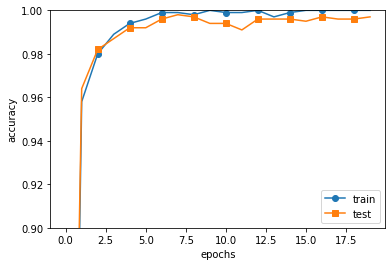

In [2]:
## simple convolutional network(cnn)(chap07)
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.img_oxt import load_oxt
from common.simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_oxt(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=3, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=120,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.9, 1.0)
plt.legend(loc='lower right')
plt.show()


train loss:1.0798191848380816
=== epoch:1, train acc:0.359, test acc:0.361 ===
train loss:1.111490909916366
train loss:1.07919547718434
train loss:1.071870844607949
train loss:1.0529894145018006
train loss:1.0586883634023079
train loss:1.0054977772278424
train loss:1.0278231871923007
train loss:0.9905931323116974
train loss:1.012972001847353
train loss:0.9839848658003808
train loss:0.9927358047428538
train loss:0.9431157334374897
train loss:0.9315779569974606
train loss:0.9468026650283458
train loss:0.906094211607014
train loss:0.9317285111735292
train loss:0.8981912118414307
train loss:0.8322493191973357
train loss:0.8729625411266857
train loss:0.9599173330716574
train loss:0.9046085764387336
train loss:0.8316572868001095
train loss:0.8240966024255842
train loss:0.8321243006041216
train loss:0.7699369378026512
train loss:0.7543783525378475
train loss:0.7788278873274979
train loss:0.6983189699535849
train loss:0.8490332876246051
train loss:0.6869788735777699
train loss:0.83696120584167

train loss:0.37306867175759767
train loss:0.3033900371696974
train loss:0.4193090326677654
train loss:0.3032542612428833
train loss:0.39471945988579754
train loss:0.4064137457554365
train loss:0.3175722622118981
train loss:0.3123230158253662
train loss:0.4223871543239312
train loss:0.39107656881109704
train loss:0.3126280988191846
train loss:0.42637634797220475
train loss:0.3998444026194445
train loss:0.40363354797696843
train loss:0.43917964096933265
train loss:0.4379317590017762
train loss:0.4281118387551485
train loss:0.34200715205537713
train loss:0.28825337468446155
train loss:0.3352875152097559
train loss:0.3480716358899161
train loss:0.34045602520574403
train loss:0.3629042892697631
train loss:0.4258997321552686
train loss:0.42822994325985714
train loss:0.4054331527682449
train loss:0.39583788088163224
train loss:0.335708681421036
train loss:0.36089978719868354
train loss:0.3226947450018009
train loss:0.33298280980041534
train loss:0.410160979361872
train loss:0.3966472810397684

train loss:0.3632060902505918
train loss:0.30067253837356717
train loss:0.34168171983466994
train loss:0.38082286981209623
train loss:0.32475078783012007
train loss:0.3205394460372328
train loss:0.32565948179744364
train loss:0.3588641908795759
train loss:0.379460868346461
train loss:0.31061997037531186
train loss:0.34900938470776666
train loss:0.3730768729634633
train loss:0.3716291259090016
train loss:0.3946536841731766
train loss:0.35592608019377925
train loss:0.45400482020521754
train loss:0.31693115370679276
train loss:0.35386490035824186
train loss:0.3181880943187153
train loss:0.30178134071306345
train loss:0.4363925843575359
train loss:0.38886933443061894
train loss:0.32960403721047626
train loss:0.3912526556113355
train loss:0.3226890988175752
train loss:0.3499284942162325
train loss:0.30555837868656754
train loss:0.3131729882034176
train loss:0.3266044847335845
train loss:0.38320296890841876
train loss:0.2911216898534461
train loss:0.4173438459730129
train loss:0.376293731548

train loss:0.2941892494839364
train loss:0.3139531002239638
train loss:0.31166320876435966
train loss:0.2542764256057019
train loss:0.3089335540019415
train loss:0.3290774401756748
train loss:0.3474165628181808
train loss:0.26667430307659795
train loss:0.3347394615022318
train loss:0.4167335348909998
train loss:0.33426848391903713
train loss:0.34831706723185507
train loss:0.2944191183123319
train loss:0.3073429359234204
train loss:0.33053676856464914
train loss:0.24470590459045868
train loss:0.309456993079639
train loss:0.36430620324733926
train loss:0.3161084176101657
train loss:0.3285077271479334
train loss:0.3801476986030251
train loss:0.30639470956469955
train loss:0.31032118476123544
train loss:0.3934292093173094
train loss:0.3415976653836103
train loss:0.3616260426041424
train loss:0.3321480025950508
train loss:0.3017336319745088
train loss:0.35869239077411297
train loss:0.3472931452133143
train loss:0.4886650701103448
train loss:0.34836885517857374
train loss:0.29533455960863986

train loss:0.29193518111980554
train loss:0.39188972915687625
train loss:0.3194943963179239
train loss:0.37322256358173056
train loss:0.2680102917530001
train loss:0.40428974823213343
train loss:0.3796735363498165
train loss:0.35930387402598585
train loss:0.2898609848619934
train loss:0.44292452838761076
train loss:0.39485323565644276
train loss:0.26779423676448316
train loss:0.3336832035714778
train loss:0.33334714032784624
train loss:0.35154358660721197
train loss:0.3017427013590058
train loss:0.3536721544048832
train loss:0.30970716995384145
train loss:0.3076273372014777
train loss:0.31069920497969555
train loss:0.33650077222445834
train loss:0.31234349686318175
train loss:0.37574469039651465
train loss:0.32154945651310346
train loss:0.24343620871093685
train loss:0.449514970934098
=== epoch:4, train acc:0.988, test acc:0.985 ===
train loss:0.42058024421513446
train loss:0.3846044058864038
train loss:0.3780972980019675
train loss:0.2733288190484501
train loss:0.3887930264780957
trai

train loss:0.29606133315208244
train loss:0.3265671532563567
train loss:0.3755392284861972
train loss:0.3433400663136311
train loss:0.31978649447199126
train loss:0.2775126413861545
train loss:0.32623301365751955
train loss:0.2774473570623342
train loss:0.36983719745311144
train loss:0.3572375370598499
train loss:0.30593002876599357
train loss:0.3110473469573877
train loss:0.32789754067082
train loss:0.3596012253711514
train loss:0.3324695606168991
train loss:0.3003070264678577
train loss:0.24057238061499694
train loss:0.32196232467335784
train loss:0.3822447582230743
train loss:0.31220444517814994
train loss:0.25997666123158875
train loss:0.3881123022263019
train loss:0.3315301493923072
train loss:0.37929155031214584
train loss:0.3509503732769486
train loss:0.34447058698297267
train loss:0.33283613488735125
train loss:0.3022071454258427
train loss:0.29980318756678914
train loss:0.35887159169705524
train loss:0.31670388660064575
train loss:0.3628953408526614
train loss:0.28220142469541

train loss:0.333752539382455
train loss:0.31165066074558206
train loss:0.3281523441790167
train loss:0.37923350242000414
train loss:0.3473570537195831
train loss:0.3049103796357533
train loss:0.351975152183264
train loss:0.3153703041223802
train loss:0.2606801468611804
train loss:0.30913019479112835
train loss:0.36244531786871087
train loss:0.3285377943500197
train loss:0.3208625025691995
train loss:0.25663597037065505
train loss:0.24418957359091367
train loss:0.3238674327281498
train loss:0.31326401247610686
train loss:0.3489630341196976
train loss:0.2746752903150263
train loss:0.3582129239296453
train loss:0.3912027923055652
train loss:0.34693493308076845
train loss:0.37036416981149745
train loss:0.2855370603656608
train loss:0.40447666173539504
train loss:0.34840128795583664
train loss:0.3326111003464091
train loss:0.41918784590184205
train loss:0.4528907779988038
train loss:0.34262840683399104
train loss:0.3082117658828597
train loss:0.34796313576283694
train loss:0.297509216859421

train loss:0.31619298169553756
train loss:0.3425702513977882
train loss:0.384335182505832
train loss:0.3439404221484708
train loss:0.3306439394611383
train loss:0.372158698610372
train loss:0.3038513450479451
train loss:0.301056283437671
train loss:0.3575248739478738
train loss:0.30206298786771474
train loss:0.25814805497431276
train loss:0.3147607714256144
train loss:0.4978417339819991
train loss:0.3035515615612517
train loss:0.3218703347393648
train loss:0.34723191939086223
train loss:0.41582337151510484
train loss:0.3808723752725925
train loss:0.33290820758308104
train loss:0.3848330312071767
train loss:0.3368417616058999
train loss:0.2758964936879804
train loss:0.3367875449113566
train loss:0.2595150486858959
train loss:0.33403386634335086
train loss:0.40170116085341584
train loss:0.3972573702085845
train loss:0.4299702843911979
train loss:0.2563738507121185
train loss:0.41621578181117547
train loss:0.34597907781828996
train loss:0.34120669755115657
train loss:0.35413980427112673
t

train loss:0.2872255954115594
train loss:0.31378423229477276
train loss:0.29211625797134083
train loss:0.2918387562423694
train loss:0.3367095193169562
train loss:0.2961863726217581
train loss:0.34992963507641756
train loss:0.34458340050058656
train loss:0.3365283946349637
train loss:0.3115986115613115
train loss:0.3070713493770871
train loss:0.3579227413675682
train loss:0.36125603704101433
train loss:0.3293901101603188
train loss:0.35376360486196046
train loss:0.28983337052955893
train loss:0.3490194240476518
train loss:0.32330088622199715
train loss:0.27628547005637116
train loss:0.332549560073926
train loss:0.3177257977678896
train loss:0.3136627797237834
train loss:0.2703658932918169
train loss:0.3414992254029483
train loss:0.34508442726622846
train loss:0.3134580813165255
train loss:0.28228787245271164
train loss:0.31340650541595283
train loss:0.3348223033146925
train loss:0.35317844275856924
train loss:0.33208469818895664
train loss:0.34930715561153514
train loss:0.3477889129171

train loss:0.3056496236752639
train loss:0.29422646820206205
train loss:0.32047475524648356
train loss:0.3015189819435903
train loss:0.3889561058526028
train loss:0.3196709699051597
train loss:0.3454190516586255
train loss:0.30737130073819124
train loss:0.2933947786866496
train loss:0.3629913962897337
train loss:0.2618064472906764
train loss:0.38004687957008537
train loss:0.2686503599073509
train loss:0.2537114056981413
train loss:0.29459647998926475
train loss:0.28348299354026973
train loss:0.31981869056800655
train loss:0.2768938221269996
train loss:0.26379501922089527
train loss:0.33988335401145875
train loss:0.32317997893009737
train loss:0.5841695820732906
train loss:0.39367315157025307
train loss:0.2961861416647273
train loss:0.36414982511942184
train loss:0.2945600526245404
train loss:0.2643841030369385
train loss:0.284988232281018
train loss:0.33450847651654136
train loss:0.3107381266263246
train loss:0.26181618340594337
train loss:0.3856295625761275
train loss:0.28592153395486

train loss:0.31707445931029377
train loss:0.2877193867232981
train loss:0.34706420870459287
train loss:0.3636728816355924
train loss:0.3041582337033652
train loss:0.30768712877719234
train loss:0.26767603102002385
train loss:0.3053911831656887
train loss:0.25349114457497496
train loss:0.2949471089674507
train loss:0.287642243830956
train loss:0.26438789390463724
train loss:0.3100723651777662
train loss:0.30248231034958517
train loss:0.31391840083737976
train loss:0.3169417552558074
train loss:0.29358100283518784
train loss:0.28485128164448503
train loss:0.3098996876588901
train loss:0.2823842630101639
train loss:0.29321042846992135
train loss:0.26763418316379967
train loss:0.29837475238127276
train loss:0.3405010614549495
train loss:0.27885097683235177
train loss:0.2972855147395374
train loss:0.4477461878556428
train loss:0.31561374161769795
train loss:0.2329570102732714
train loss:0.27887581220141644
train loss:0.32383411650478267
train loss:0.334918336011481
train loss:0.330009217799

train loss:0.3273821527376562
train loss:0.26434530278023843
train loss:0.28260522930742393
train loss:0.2902576398897295
train loss:0.26827248864248604
train loss:0.34900531346318303
train loss:0.31471903362230336
train loss:0.31605067616312266
train loss:0.3376623983805177
train loss:0.31427308304061635
train loss:0.34829394139436826
train loss:0.36214644940093677
train loss:0.2823261813499984
train loss:0.3012776605794792
train loss:0.318053210087629
train loss:0.32641367669165455
train loss:0.2682728393385101
train loss:0.297089352076733
train loss:0.3318070727791416
train loss:0.32768227123974236
train loss:0.29053380224332864
train loss:0.29525275726366323
train loss:0.33714836004502485
train loss:0.2973604914445694
train loss:0.3370694198153463
train loss:0.23717676096355544
train loss:0.2797915096938327
train loss:0.2789025489964294
train loss:0.2868293601520938
train loss:0.32145094998361035
train loss:0.32384174757165834
train loss:0.3348335058566266
train loss:0.324580539571

train loss:0.27160698674180506
train loss:0.3027272408416105
train loss:0.2426667695940042
train loss:0.3960016120214233
train loss:0.3979955167422578
train loss:0.32586654995160713
train loss:0.4145214962179838
train loss:0.24398476238761663
train loss:0.3096212471970967
train loss:0.3033450451018346
train loss:0.305715966810986
train loss:0.3052265260058727
train loss:0.3656697898729734
train loss:0.2552802512530691
train loss:0.26104779271948064
train loss:0.2518272831981238
train loss:0.26990043004134884
train loss:0.3118946419183129
train loss:0.30967809917244354
train loss:0.32083135324248163
train loss:0.33636807053434153
train loss:0.36602694935287067
train loss:0.28934895781515346
train loss:0.33405057672002936
train loss:0.2842399182795866
train loss:0.3507560255667698
train loss:0.29918657539300625
train loss:0.30691964869671
train loss:0.31401885084962683
train loss:0.24337485137094247
train loss:0.3063144486031805
train loss:0.324008740784051
train loss:0.38452599185797803

train loss:0.28992928880115953
train loss:0.2501406266484708
train loss:0.3731283335314064
train loss:0.30197822614615727
train loss:0.30022504672769884
train loss:0.32697969183622533
train loss:0.3378911154735943
train loss:0.3190241956186274
train loss:0.3053900535660512
train loss:0.24582423012886553
train loss:0.26595351825339913
train loss:0.32417967695120437
train loss:0.31469982423183146
train loss:0.3076214661556602
train loss:0.3926342093780069
train loss:0.375266641675994
train loss:0.3311526534784355
train loss:0.3022324006764761
train loss:0.33225438271639807
train loss:0.36640101952467563
train loss:0.27365738480678165
train loss:0.3222025527969524
train loss:0.24206928050279866
train loss:0.2582772769494613
train loss:0.30227866468508646
train loss:0.31564934799615385
train loss:0.29182484358321353
train loss:0.32464455072047166
train loss:0.2659084387164148
train loss:0.3291901350778542
train loss:0.3585085272815867
train loss:0.3962729896829142
train loss:0.302780270361

train loss:0.25328836354300316
train loss:0.3245995753222663
train loss:0.3231056054915413
train loss:0.40696748451268383
train loss:0.3758908083642435
train loss:0.3471617099082606
train loss:0.3222080708462247
train loss:0.3067149817469662
train loss:0.2749053348849536
train loss:0.29330082297787263
train loss:0.30296163520163594
train loss:0.28818813462730286
train loss:0.31585241100994155
train loss:0.3173779530133327
train loss:0.3704183561914064
train loss:0.2440270774815167
train loss:0.2842345575764081
train loss:0.3602667374704396
train loss:0.3762673437046915
train loss:0.43190274839096693
train loss:0.31435329316902677
train loss:0.3160679498550942
train loss:0.3197979479537954
train loss:0.2721382104542978
train loss:0.34321974709060155
train loss:0.29512008167999837
train loss:0.3279455431589752
train loss:0.3632183912750782
train loss:0.3107296655509818
train loss:0.2641664222980227
train loss:0.3809223339730938
train loss:0.3066999398950196
train loss:0.353079340301466
t

train loss:0.20898290723552887
train loss:0.3156437930855843
train loss:0.27378139634391824
train loss:0.2818482734504915
train loss:0.2985799184420768
train loss:0.30039346930434685
train loss:0.3098090804438349
train loss:0.26860594375764574
train loss:0.3165953628188481
train loss:0.3180326321391705
train loss:0.3169413490343415
train loss:0.32435227285846635
train loss:0.2751142112506985
=== epoch:12, train acc:0.999, test acc:1.0 ===
train loss:0.27006230574850554
train loss:0.3094815628710766
train loss:0.3375375748630761
train loss:0.3392580971378997
train loss:0.26577569260409295
train loss:0.27003555820012487
train loss:0.33799621448450584
train loss:0.33211741391270844
train loss:0.3532006698799303
train loss:0.3216889321814795
train loss:0.32342289345543956
train loss:0.287923138590805
train loss:0.2881261843492486
train loss:0.39436892778754046
train loss:0.3249749684941058
train loss:0.3657110088407413
train loss:0.2925225761989387
train loss:0.3220495937998991
train loss:

train loss:0.3111886698519835
train loss:0.32992674232840097
train loss:0.288362463821476
train loss:0.2951785420317037
train loss:0.3560936145662366
train loss:0.24312671560940347
train loss:0.28767124140783434
train loss:0.34999847809401174
train loss:0.3335371372977954
train loss:0.27631904829391674
train loss:0.3371125162574521
train loss:0.31190567798528707
train loss:0.34979918474720173
train loss:0.34635827747205133
train loss:0.2755018077467498
train loss:0.26495585000723976
train loss:0.30321582795919094
train loss:0.22746645036789487
train loss:0.3529648045927784
train loss:0.3320955723498294
train loss:0.3156983519035385
train loss:0.26983428754824285
train loss:0.30433898618658356
train loss:0.34355930289718467
train loss:0.36117922768124733
train loss:0.3542092522151982
train loss:0.29254020337405134
train loss:0.35580902034986034
train loss:0.2951871244031208
train loss:0.3693681417138179
train loss:0.30726960033755646
train loss:0.25251675426907955
train loss:0.305200998

train loss:0.3980971551801611
train loss:0.31468682516947194
train loss:0.292727157671935
train loss:0.3313945852391211
train loss:0.29490147137378836
train loss:0.24097282453651156
train loss:0.2847876362771405
train loss:0.29780103099999783
train loss:0.3744784745813338
train loss:0.2910876192396007
train loss:0.36958339850607036
train loss:0.2716426230171629
train loss:0.32896142631157116
train loss:0.2920456984882624
train loss:0.3371075088480504
train loss:0.3214151501201213
train loss:0.28573890360706466
train loss:0.31851969034585537
train loss:0.2353064049428006
train loss:0.3175938141521654
train loss:0.2927931659250938
train loss:0.29757613616380024
train loss:0.3005613629394318
train loss:0.30792417234905867
train loss:0.3159083728375209
train loss:0.2785721850680384
train loss:0.23886357289484128
train loss:0.33095383338064427
train loss:0.26263911128234646
train loss:0.2911231160696442
train loss:0.3081181307394831
train loss:0.29681452967886024
train loss:0.30732133585113

train loss:0.24518184104962357
train loss:0.34183933754002377
train loss:0.30698853839196194
train loss:0.3338230965142665
train loss:0.3164707596565103
train loss:0.3721045279274223
train loss:0.29380297594118615
train loss:0.3677052116972292
train loss:0.3907854939066665
train loss:0.3930598606057217
train loss:0.26305061654391126
train loss:0.24628514574881913
train loss:0.38118928175097416
train loss:0.275545829540604
train loss:0.32133324966269844
train loss:0.3075423833428971
train loss:0.3639469384062513
train loss:0.2598782386101765
train loss:0.2971296167836305
train loss:0.3020336772347521
train loss:0.35351145384579485
train loss:0.2838659560363746
train loss:0.30080071346148
train loss:0.2951007069560268
train loss:0.3021115357264739
train loss:0.29628814247931606
train loss:0.3078977965313328
train loss:0.2875957140072754
train loss:0.32087115391172805
train loss:0.4091994178429305
train loss:0.3155285066016944
train loss:0.3377955041174134
train loss:0.3351868601893168
tr

train loss:0.32030778954215505
train loss:0.3348962429960348
train loss:0.39585721169103777
train loss:0.41661136655051234
train loss:0.3576028761509704
train loss:0.3498396021143808
train loss:0.3290854132618935
train loss:0.3441614617087388
train loss:0.24192945320933212
train loss:0.3361518749121846
train loss:0.3334398346025656
train loss:0.22343053576388697
train loss:0.32843742510822743
train loss:0.3477395664671142
train loss:0.32323350172873094
train loss:0.3107034124300242
train loss:0.3661320871150617
train loss:0.3039625964909099
train loss:0.28081868390843184
train loss:0.33811413460210626
train loss:0.31037269535273176
train loss:0.2729759393260843
train loss:0.32494041396802786
train loss:0.28555017360498863
train loss:0.2732329446623128
train loss:0.31352711651357235
train loss:0.32558258447661986
train loss:0.2740926491841058
train loss:0.3142437894184252
train loss:0.2537238152327325
train loss:0.3270041853120253
train loss:0.40722229675632876
train loss:0.299319324987

train loss:0.3347813325262693
train loss:0.30220124796551195
train loss:0.3456787224490533
train loss:0.23273911174106038
train loss:0.3265594622125496
train loss:0.30511211835666463
train loss:0.3433578583054614
train loss:0.2865737802368108
train loss:0.2765198361776337
train loss:0.35312239896673947
train loss:0.30418483266983193
train loss:0.27178673286890564
train loss:0.29471058890991186
train loss:0.2808582332175598
train loss:0.2992828581356935
train loss:0.27934474555293015
train loss:0.33499826387950143
train loss:0.2131413879223913
train loss:0.3564842587613248
train loss:0.33373921503364173
train loss:0.32220094740545563
train loss:0.24303830863795728
train loss:0.3601589189358104
train loss:0.2624647776149862
train loss:0.38336481629525915
train loss:0.25433252820978963
train loss:0.27148056283601096
train loss:0.2130637084264358
train loss:0.28787232615138314
train loss:0.26037891118288137
train loss:0.26973693349068323
train loss:0.34555985378145215
train loss:0.37959409

ValueError: x and y must have same first dimension, but have shapes (20,) and (15,)

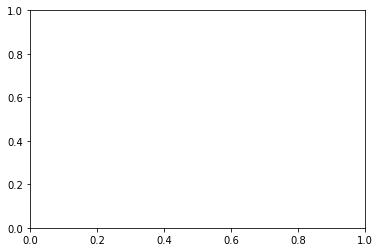

In [3]:
# Deep convolutional Network(chap08)
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.img_oxt import load_oxt
from common.deep_convnet import DeepConvNet
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_oxt(flatten=False)

network = DeepConvNet()  
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=15, mini_batch_size=120,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보관
network.save_params("deep_convnet_params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.9, 1.0)
plt.legend(loc='lower right')
plt.show()

In [3]:
# Deep convolutional Network(chap08)
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.img_oxt import load_oxt
from common.deep_convnet import DeepConvNet
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_oxt(flatten=False)

network = DeepConvNet()  
network.load_params("deep_convnet_params.pkl")

from tkinter import *
from PIL import ImageTk, Image
from tkinter import filedialog
import sys
import numpy as np
import cv2

window = Tk()
window.title('oxt 예측하기')
    
oldx = oldy = -1

def on_mouse(event, x, y, flags, param):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        # print('EVENT_LBUTTONDOWN: %d, %d' % (x, y))

    # elif event == cv2.EVENT_LBUTTONUP:
        # print('EVENT_LBUTTONUP: %d, %d' % (x, y))

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), 0, 5, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y

def crt():
    global img, tmp_img
    img = np.ones((280, 280), dtype=np.uint8) * 255

    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_mouse, img)

    cv2.imshow('image', img)
    cv2.waitKey(3000)

    cv2.destroyAllWindows()
    
    img = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)     # 28*28 resize
    cv2.imwrite('tmp.png', img)
    img = ~img  # invert
    img=img.reshape(-1,1,28,28)
    
    labels_view=['o', 'x', '△']

    y=network.predict(img)
    pred_num=np.argmax(y)
    result = "my predict is %s"%(labels_view[pred_num])
    
    tmp_img=Image.open('tmp.png')
    tmp_img=ImageTk.PhotoImage(tmp_img)
    
    Label(window, text="파일경로: new").grid(row=2) # 파일경로 view
    Label(window, image=tmp_img).grid(row=3) #사진 view
    Label(window, text=result).grid(row=4) # 예측 결과 출력    

def open():
    global my_image # 함수에서 이미지를 기억하도록 전역변수 선언 (안하면 사진이 안보임)
    window.filename = filedialog.askopenfilename(initialdir='', title='파일선택', filetypes=(
    ('png files', '*.png'), ('jpg files', '*.jpg'), ('all files', '*.*')))
 
    Label(window, text="파일경로: "+window.filename).grid(row=2) # 파일경로 view
    
    img = Image.open(window.filename)
    my_image = ImageTk.PhotoImage(img)
    
    img=img.convert("L")                         # gray 저장
    img=np.invert(img)                           # 흑백을 반전
    
    # print(img.shape)                           # img의 shape 확인
    img=img.reshape(-1, 1, 28, 28)
    
    Label(window, image=my_image).grid(row=3) #사진 view
    
    labels_view=['o', 'x', '△']

    y=network.predict(img)
    pred_num=np.argmax(y)
    result = "my predict is %s"%(labels_view[pred_num])
    Label(window, text=result).grid(row=4) # 예측 결과 출력
    

b_create=Button(window, text='그리기(아무키나 누르면 닫기)', command=crt).grid(row=0)
b_open = Button(window, text='파일열기', command=open).grid(row=1)
Label(window, text="파일 경로").grid(row=2)
Label(window).grid(row=3)
Label(window, text="예측 결과").grid(row=4)

window.mainloop()